<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</b>
       * Очистка и подготовка данных
       * Пробразования данных: слияние, комбинирование и смена размерности
       * Комбинирование и слияние наборов данных

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

# Общее

#### Пропуски
* Исходные данные редко (почти никогда) не бывает "чистыми"
* Основновными проблемами являются: __пропуски__ и __выбросы__
* Работа с неполными данными может быть организована __по разному__
* От того, как мы будем работать с этим зависит __качество__ последующей обработки
* Существенную помощь в заполнении данных оказывают __статистика__ и __графики__

#### Отчеты
* Отчет - это __"лицо"__ проведенной работы
* (очень) Усредненно отчет по данным состоит из:
    - описания __входных__ данных
    - основной части с __графиками__ и __таблицами__
    - выводов
* Наиболее распространенный элемент отчета - __сводная таблица__
* Для построения таблицы используются функции __группировки__ и __агрегирования (агрегации)__

#### Преобразования
* данные редко "доживают" до конца в неизменном виде, "перетекая" между различными датафреймами, массивами и сериями с сохранением исходного значения
* это происходит за счет __реиндексации__, __слияний__, __разделений__, __преобразование размерности__, __преобразований строк и столбцов__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import os
from numpy.random import randn
%matplotlib inline

In [2]:
import os
import os.path

## Загрузите данные с kaggle

In [3]:
#!wget https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region
ds = os.path.join("Lesson_08_files", "sudeste.csv")
df = pd.read_csv(ds)

In [4]:
df.head(5)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [5]:
df.columns

Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
       'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
       'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin',
       'wdsp', 'wdct', 'gust'],
      dtype='object')

In [6]:
df.shape

(9779168, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
 #   Column  Dtype  
---  ------  -----  
 0   wsid    int64  
 1   wsnm    object 
 2   elvt    float64
 3   lat     float64
 4   lon     float64
 5   inme    object 
 6   city    object 
 7   prov    object 
 8   mdct    object 
 9   date    object 
 10  yr      int64  
 11  mo      int64  
 12  da      int64  
 13  hr      int64  
 14  prcp    float64
 15  stp     float64
 16  smax    float64
 17  smin    float64
 18  gbrd    float64
 19  temp    float64
 20  dewp    float64
 21  tmax    float64
 22  dmax    float64
 23  tmin    float64
 24  dmin    float64
 25  hmdy    float64
 26  hmax    float64
 27  hmin    float64
 28  wdsp    float64
 29  wdct    float64
 30  gust    float64
dtypes: float64(20), int64(5), object(6)
memory usage: 2.3+ GB


In [8]:
df.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,1.407984e+06,9.779168e+06,...,9.779142e+06,9.778858e+06,9.779134e+06,9.778361e+06,9.779168e+06,9.779156e+06,9.779124e+06,8.853607e+06,9.779168e+06,9.462694e+06
mean,3.592531e+02,5.940923e+02,-2.023082e+01,-4.464590e+01,2.011164e+03,6.521960e+00,1.575465e+01,1.150000e+01,9.366544e-01,8.804292e+02,...,2.110503e+01,1.524025e+01,1.986418e+01,1.422089e+01,6.726667e+01,6.996991e+01,6.441965e+01,1.998156e+00,1.385991e+02,4.494015e+00
std,3.901630e+01,3.980379e+02,3.172643e+00,4.882117e+00,3.207774e+00,3.425538e+00,8.802154e+00,6.922190e+00,2.923291e+00,2.482650e+02,...,7.545549e+00,5.866811e+00,7.134849e+00,5.777089e+00,2.654213e+01,2.643371e+01,2.656550e+01,1.618531e+00,1.052018e+02,2.981790e+00
min,1.780000e+02,0.000000e+00,-2.496282e+01,-5.667732e+01,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.200000e+00,-1.000000e+01,-8.500000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.280000e+02,2.830000e+02,-2.239580e+01,-4.743410e+01,2.009000e+03,4.000000e+00,8.000000e+00,5.000000e+00,0.000000e+00,9.113000e+02,...,1.820000e+01,1.270000e+01,1.720000e+01,1.160000e+01,5.300000e+01,5.800000e+01,4.900000e+01,8.000000e-01,5.600000e+01,2.300000e+00
50%,3.580000e+02,5.730000e+02,-2.075041e+01,-4.445378e+01,2.011000e+03,7.000000e+00,1.600000e+01,1.200000e+01,0.000000e+00,9.442000e+02,...,2.190000e+01,1.660000e+01,2.080000e+01,1.560000e+01,7.400000e+01,7.800000e+01,7.000000e+01,1.700000e+00,1.140000e+02,4.200000e+00
75%,3.940000e+02,8.750000e+02,-1.891707e+01,-4.243575e+01,2.014000e+03,9.000000e+00,2.300000e+01,1.800000e+01,6.000000e-01,9.731000e+02,...,2.580000e+01,1.940000e+01,2.420000e+01,1.840000e+01,8.900000e+01,9.100000e+01,8.600000e+01,2.900000e+00,2.160000e+02,6.300000e+00
max,4.230000e+02,1.758000e+03,0.000000e+00,0.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+02,1.050000e+03,...,4.500000e+01,4.480000e+01,4.500000e+01,4.490000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.980000e+01,3.600000e+02,5.000000e+01


## <font color=red>ЗАДАНИЕ</font>

Какие поля в describe "бесполезны" и почему? 
wsid - идентификатор, {yr, mo, da, hr} - временные параметры измерений;
{lat, lon} - параметры местоположения

In [9]:
df.wsid.unique() #unique values from column

array([178, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
       328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
       380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
       393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
       406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 421, 422, 423])

## <font color=red>ЗАДАНИЕ</font>

Выведите графики средней температуры и средней влажности на метеостанции 383 зависимости от даты либо в двух смежных графиках, либо на одном с правой и левой осями

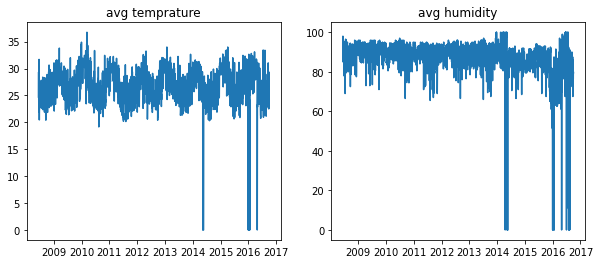

In [10]:
# Ваш код
df_383 = df[['tmin', 'tmax', 'date', 'hmax', 'hmin']][df.wsid == 383]
df_383.set_index('date', inplace=True)
df_383 = df_383.groupby('date').max()
df_383 = df_383.assign(t_mean=(df_383.tmin + df_383.tmax)/2, h_mean=(df_383.hmin + df_383.hmax) / 2)
df_383.index = pd.to_datetime(df_383.index)
fig = plt.figure(figsize=(10,4))
ax_t = fig.add_subplot(1,2,1)
ax_h = fig.add_subplot(1,2,2)
ax_t.set_title("avg temprature")
ax_h.set_title("avg humidity")
ax_t.plot(df_383.index, df_383.t_mean)
ax_h.plot(df_383.index, df_383.h_mean)
plt.show();

## Очистка и подготовка данных

### Работа пропущенных данных

In [11]:
string_data = pd.Series(['дыня', 'тыква', np.nan, 'помидор'])
string_data

0       дыня
1      тыква
2        NaN
3    помидор
dtype: object

In [12]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [13]:
string_data

0       None
1      тыква
2        NaN
3    помидор
dtype: object

In [14]:
string_data.value_counts()

помидор    1
тыква      1
dtype: int64

### Фильтрация пропущенных данных

In [15]:
from numpy import nan as NA

data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [16]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [17]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [18]:
cleaned = data.dropna()

In [19]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [20]:
data.dropna(how='all') #only full-nan rows

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [21]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [22]:
data.dropna(axis=1, how='all') #only full-nan columns

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [23]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,0.550346,NaN,NaN
1,-1.910690,NaN,NaN
2,-0.598030,NaN,-1.053016
3,-0.850308,NaN,1.460922
4,1.089650,-0.477760,0.002422
5,-1.001142,1.409244,-1.225785
6,-0.048830,0.257910,0.726740


In [24]:
df.dropna()

,0,1,2
4,1.089650,-0.477760,0.002422
5,-1.001142,1.409244,-1.225785
6,-0.048830,0.257910,0.726740


In [25]:
df.dropna(thresh=2) #keep row only with at least N non-nans

,0,1,2
2,-0.598030,NaN,-1.053016
3,-0.850308,NaN,1.460922
4,1.089650,-0.477760,0.002422
5,-1.001142,1.409244,-1.225785
6,-0.048830,0.257910,0.726740


### Заполнение пропущенных данных

In [26]:
df.fillna(0)

,0,1,2
0,0.550346,0.000000,0.000000
1,-1.910690,0.000000,0.000000
2,-0.598030,0.000000,-1.053016
3,-0.850308,0.000000,1.460922
4,1.089650,-0.477760,0.002422
5,-1.001142,1.409244,-1.225785
6,-0.048830,0.257910,0.726740


In [27]:
df.fillna({1: 0.5, 2: 0}) #col_id : val

,0,1,2
0,0.550346,0.500000,0.000000
1,-1.910690,0.500000,0.000000
2,-0.598030,0.500000,-1.053016
3,-0.850308,0.500000,1.460922
4,1.089650,-0.477760,0.002422
5,-1.001142,1.409244,-1.225785
6,-0.048830,0.257910,0.726740


In [28]:
_ = df.fillna(0, inplace=True) #keeping changes in same variable
df

,0,1,2
0,0.550346,0.000000,0.000000
1,-1.910690,0.000000,0.000000
2,-0.598030,0.000000,-1.053016
3,-0.850308,0.000000,1.460922
4,1.089650,-0.477760,0.002422
5,-1.001142,1.409244,-1.225785
6,-0.048830,0.257910,0.726740


In [29]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,2.130595,-0.566869,0.118137
1,-0.505490,0.018220,0.083561
2,-0.641276,NaN,-0.323778
3,2.385595,NaN,1.436524
4,0.574671,NaN,NaN
5,-0.349009,NaN,NaN


In [30]:
df.fillna(method='ffill') #fill with last non-nan val in col

,0,1,2
0,2.130595,-0.566869,0.118137
1,-0.505490,0.018220,0.083561
2,-0.641276,0.018220,-0.323778
3,2.385595,0.018220,1.436524
4,0.574671,0.018220,1.436524
5,-0.349009,0.018220,1.436524


In [31]:
df.fillna(method='ffill', limit=2) #fill 2 nans with last non-nan val in col

,0,1,2
0,2.130595,-0.566869,0.118137
1,-0.505490,0.018220,0.083561
2,-0.641276,0.018220,-0.323778
3,2.385595,0.018220,1.436524
4,0.574671,NaN,1.436524
5,-0.349009,NaN,1.436524


In [32]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

(array([1., 0., 0., 0., 3., 0., 0., 0., 0., 1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

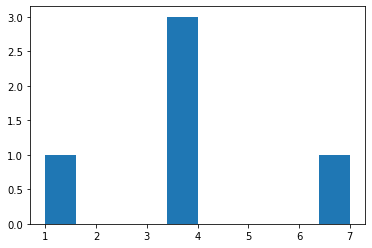

In [33]:
plt.hist(data.fillna(data.mean()))

## Преобразования данных

### Удаление дубликатов

In [34]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [35]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [36]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [37]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [38]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [39]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Преобразование данных с помощью отображения и функции

In [40]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [41]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [42]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [43]:
data['animal'] = data['food'].str.lower().map(meat_to_animal) #Map values of Series according to input
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [44]:
data['food'].map(lambda x: meat_to_animal[x.lower()])
#apply works on a row / column basis of a DataFrame, 
#applymap works element-wise on a DataFrame, and 
#map works element-wise on a Series

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Замена значений

In [45]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [46]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [47]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [48]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Переименование индексов осей

In [49]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [50]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [51]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [52]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [53]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [54]:
data.rename(columns={'three': 'peekaboo'})

,one,two,peekaboo,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [55]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Дискретизация и раскладка по "корзинам"

In [56]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [57]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins) #Bin values into discrete intervals
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [58]:
len(ages )

12

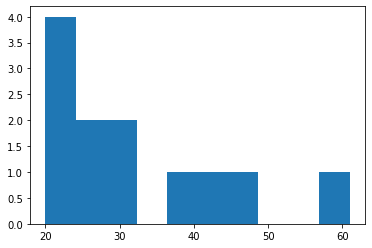

In [59]:
plt.hist(ages);

In [60]:
cats.codes
cats.categories
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [61]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [62]:
group_names = ['from 18 to 25', 'from 25 to 35', 'from 35 to 60', 'above 60']
pd.cut(ages, bins, labels=group_names).value_counts()

from 18 to 25    5
from 25 to 35    3
from 35 to 60    3
above 60         1
dtype: int64

In [63]:
cats.codes
cats.categories
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [64]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.25, 0.5], (0.5, 0.74], (0.013, 0.25], (0.74, 0.98], (0.013, 0.25], ..., (0.74, 0.98], (0.013, 0.25], (0.74, 0.98], (0.013, 0.25], (0.25, 0.5]]
Length: 20
Categories (4, interval[float64]): [(0.013, 0.25] < (0.25, 0.5] < (0.5, 0.74] < (0.74, 0.98]]

In [65]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats
pd.value_counts(cats)

(0.624, 3.079]       250
(0.00292, 0.624]     250
(-0.725, 0.00292]    250
(-3.697, -0.725]     250
dtype: int64

In [66]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]).value_counts()

(-3.697, -1.339]     100
(-1.339, 0.00292]    400
(0.00292, 1.24]      400
(1.24, 3.079]        100
dtype: int64

### Детектирование и фильтрация выборосов

In [67]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.005463,0.016672,0.004895,-0.002679
std,0.997218,1.023120,0.968151,1.029588
min,-2.821744,-4.135728,-2.837255,-3.215523
25%,-0.659757,-0.638428,-0.651332,-0.717298
50%,-0.044029,0.030871,0.005581,-0.005451
75%,0.664782,0.698745,0.647695,0.699478
max,3.186010,2.817695,3.074993,3.407558


In [68]:
col = data[2]
df1 = col[np.abs(col) < 3]

In [69]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
151,0.371265,-3.274191,0.121519,-0.906468
165,-0.556605,0.416980,3.066828,-1.418285
270,3.186010,0.514129,-1.848151,0.814319
417,0.082062,-3.457351,-1.085979,-1.047999
491,1.793261,0.895497,1.764167,3.099529
691,0.966721,-4.135728,-0.940340,-0.272152
708,-0.863318,-0.204858,-1.133779,-3.003311
740,1.304656,1.909357,0.591631,3.407558
825,0.155195,0.019714,3.074993,-1.001236
990,0.238333,0.951565,0.506836,-3.215523


In [70]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.005277,0.018540,0.004753,-0.002967
std,0.996641,1.016818,0.967706,1.027359
min,-2.821744,-3.000000,-2.837255,-3.000000
25%,-0.659757,-0.638428,-0.651332,-0.717298
50%,-0.044029,0.030871,0.005581,-0.005451
75%,0.664782,0.698745,0.647695,0.699478
max,3.000000,2.817695,3.000000,3.000000


In [71]:
np.sign(data).head()

,0,1,2,3
0,-1.0,-1.0,1.0,1.0
1,-1.0,1.0,1.0,-1.0
2,1.0,-1.0,1.0,1.0
3,-1.0,-1.0,-1.0,1.0
4,-1.0,-1.0,1.0,-1.0


### Перестановка и случайная выборка

In [72]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5) #Randomly permute a sequence, or return a permuted range-перестановка в выборке
sampler

array([3, 0, 1, 2, 4])

In [73]:
df 
df.take(sampler) #take - возвращает элементы в заданных позиционных индексах вдоль оси
#с помощью take и permutation удобно разбивать выборку для маш-го обучения

,0,1,2,3
3,12,13,14,15
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
4,16,17,18,19


In [74]:
df.sample(n=3) # Generates random samples from each group of a DataFrame 

,0,1,2,3
0,0,1,2,3
2,8,9,10,11
1,4,5,6,7


In [75]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True) #(number of objs to return, Allow sampling of same row more than once)
draws

4    4
0    5
1    7
0    5
2   -1
3    6
3    6
1    7
4    4
4    4
dtype: int64

### Вычисление индикативных (знаковых) переменных

In [76]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [77]:
x = pd.get_dummies(df['key']) #Convert categorical variable into dummy/indicator variables
x = x.astype('int8')
x
#удобно в анализе текстов или в фильтрации (объем хранимых данных уменьшается в перспективе)

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [78]:
x[x['a']==1]

,a,b,c
2,1,0,0
4,1,0,0


In [79]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [80]:
df[['data1']]

,data1
0,0
1,1
2,2
3,3
4,4
5,5


In [81]:
df_with_dummy = df[['data1']].join(dummies) #join (default left-join)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [82]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [83]:
mnames = ['movie_id', 'title', 'genres']
ml_1m = os.path.join("..", "datasets", "MovieLens", "ml-1m", "movies.dat")
#movies = pd.read_table(ml_1m, sep='::', header=None, names=mnames)
movies = pd.read_csv(ml_1m, sep='::', header=None, names=mnames, engine='python')
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [84]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

In [85]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [86]:
#иници-я категориального массива (по жанрам)
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|')) #в каком столбце идет категоризация

array([0, 1, 2])

In [88]:
for i, gen in enumerate(movies.genres): #enumerate - pair (id, value)
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1 #fill with 1 categorical

In [89]:
movies_windic = movies.join(dummies.add_prefix('Genre_')) #joined with iniial df for final analyze
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Adventure                                0
Genre_Fantasy                                  0
Genre_Romance                                  0
Genre_Drama                                    0
Genre_Action                                   0
Genre_Crime                                    0
Genre_Thriller                                 0
Genre_Horror                                   0
Genre_Sci-Fi                                   0
Genre_Documentary                              0
Genre_War                                      0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Film-Noir                                0
Genre_Western       

In [90]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [91]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins)) #usage for connect with bins (intervals)
#использовать разреженные массивы при малости вхождения признака 

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


### Векторизация строковых операций в pandas

In [83]:
import re

In [84]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [85]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [86]:
data.str.contains('gmail') #str - Vectorized string functions for Series and Index

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [87]:
# Важно! За findall находится re, без него не заработает
import re

pattern = '.*@'
data.str.findall(pattern, flags=re.IGNORECASE)

Dave      [dave@]
Steve    [steve@]
Rob        [rob@]
Wes           NaN
dtype: object

In [88]:
matches = data.str.match(pattern, flags=re.IGNORECASE) #logical search
matches, type(matches)

(Dave     True
 Steve    True
 Rob      True
 Wes       NaN
 dtype: object,
 pandas.core.series.Series)

In [89]:
data.str[:5] #str срез массива символов строки 

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

## <font color=red>ЗАДАНИЕ</font>

* Какие  поля требуется заполнять
* Почему? Неопределенности nan не позволяют провести текстовый анализ
* Как Вы их будете заполнять?


In [90]:
# Ваш код
data[3] = "wes@gmail.com"
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes        wes@gmail.com
dtype: object

## Пробразования данных: слияние, комбинирование и смена размерности

### Иерархическая индексация

In [91]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data
#multiindex: index with multi dimen-ns
#usage:grouping elements in indexes

a  1    1.651416
   2   -0.115398
   3   -0.337347
b  1    0.222704
   3    1.786526
c  1    0.236806
   2   -1.478429
d  2   -1.695739
   3   -0.158832
dtype: float64

In [92]:
data.index 

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [93]:
data['b']
data['b':'c']
data.loc[['b', 'd']]

b  1    0.222704
   3    1.786526
d  2   -1.695739
   3   -0.158832
dtype: float64

In [94]:
data.loc[:, 2]

a   -0.115398
c   -1.478429
d   -1.695739
dtype: float64

In [95]:
data

a  1    1.651416
   2   -0.115398
   3   -0.337347
b  1    0.222704
   3    1.786526
c  1    0.236806
   2   -1.478429
d  2   -1.695739
   3   -0.158832
dtype: float64

In [96]:
data.unstack() #разворот иерархической индексации в колонки

,1,2,3
a,1.651416,-0.115398,-0.337347
b,0.222704,NaN,1.786526
c,0.236806,-1.478429,NaN
d,NaN,-1.695739,-0.158832


In [97]:
data.unstack().stack()

a  1    1.651416
   2   -0.115398
   3   -0.337347
b  1    0.222704
   3    1.786526
c  1    0.236806
   2   -1.478429
d  2   -1.695739
   3   -0.158832
dtype: float64

In [98]:
data.stack() #no index in columns

AttributeError: 'Series' object has no attribute 'stack'

In [99]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [100]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [101]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [102]:
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']], names=['state', 'color'])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

### Переупорядочивание и сортировка уровней

In [103]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [104]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [105]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### Суммарная статистика по индексу

In [106]:
frame.sum(level='key2')
#multiindex usage with partition stats/functions

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [107]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [108]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [109]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [110]:
frame2.index

MultiIndex([('one', 0),
            ('one', 1),
            ('one', 2),
            ('two', 0),
            ('two', 1),
            ('two', 2),
            ('two', 3)],
           names=['c', 'd'])

In [111]:
frame.set_index(['c', 'd'], drop=False) #без удаления исходных колонок

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [112]:
frame2.reset_index() #default index

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Комбинирование и слияние наборов данных

### Слияние в стиле реляционной СУБД

In [113]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [114]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [115]:
pd.merge(df1, df2) #слияние merge by same-named columns (by same values there); default type - inner

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [116]:
pd.merge(df1, df2, on='key') #merge by certain col

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [117]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})


In [131]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey') #state that left_on column equiv-nt to right_on, merge by them

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [118]:
pd.merge(df1, df2, how='outer') #full outer merge 

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [119]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [120]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [121]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [122]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [123]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [124]:
pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Слияние по индексу

In [125]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [126]:
right1

,group_val
a,3.5
b,7.0


In [133]:
pd.merge(left1, right1, left_on='key', right_index=True) #merge with right tab by index if possible 

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [128]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [129]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [130]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [131]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [134]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [135]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [136]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [137]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [139]:
left2.join(right2, how='outer') #same result but different method in optimasations

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [140]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [141]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [142]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [143]:
#left2.join([right2, another], how='outer')
left2.join([right2, another], how='outer', sort=True)

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### Объединение вдоль осей

In [144]:
arr = np.arange(12).reshape((3, 4))
arr


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [145]:
np.concatenate([arr, arr], axis=1) #concat by columns 

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [146]:
np.concatenate([arr, arr], axis=0) #concat by rows

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [147]:
s1 = pd.Series([0, 1], index=['a', 'b'])

In [148]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

In [149]:
s3 = pd.Series([5, 6], index=['f', 'g'])

In [150]:
s1,s2,s3

(a    0
 b    1
 dtype: int64,
 c    2
 d    3
 e    4
 dtype: int64,
 f    5
 g    6
 dtype: int64)

In [151]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [152]:
x = pd.concat([s1, s2, s3], axis=1, sort=True)

In [153]:
type(x)

pandas.core.frame.DataFrame

In [154]:
x

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [155]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [156]:
pd.concat([s1, s4], axis=1, sort=True)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [157]:
pd.concat([s1, s4], axis=1, join='inner', sort=True)

,0,1
a,0,0
b,1,1


In [158]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three']) 
#usage: concat results from different experiments

In [159]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [167]:
result.unstack()#unstacked series with multiindex

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [168]:
type(result) 

pandas.core.series.Series

In [169]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'], sort=True)

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [170]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [171]:
df2

,three,four
a,5,6
c,7,8


In [172]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], sort=True)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [173]:
pd.concat({'level1': df1, 'level2': df2}, axis=1, sort=True)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [174]:
#pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
#          names=['upper', 'lower'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'], sort=True)

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [175]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1

,a,b,c,d
0,1.130358,0.261789,1.773610,-0.565671
1,0.521032,-0.717802,0.471724,0.113991
2,0.047335,-1.439870,-0.159749,0.037111


In [176]:
df2

,b,d,a
0,-0.785517,-0.468911,0.248624
1,1.363809,-1.372656,0.586276


In [177]:
pd.concat([df1, df2], ignore_index=True, sort=True)

,a,b,c,d
0,1.130358,0.261789,1.773610,-0.565671
1,0.521032,-0.717802,0.471724,0.113991
2,0.047335,-1.439870,-0.159749,0.037111
3,0.248624,-0.785517,NaN,-0.468911
4,0.586276,1.363809,NaN,-1.372656


### Комбинирование данных с перекрытием

In [178]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [179]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [180]:
np.where(pd.isnull(a), b, a) #if in a null - then from b

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [181]:
b[:-2].combine_first(a[2:]) 

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [182]:
a[2:]

d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [183]:
b[:-2]

f    0.0
e    1.0
d    2.0
c    3.0
dtype: float64

In [184]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [185]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [186]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Изменение размерностей и "повороты"

### Иерархическое индексирование и reshaping

In [187]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [188]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [189]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [191]:
result.unstack(0) #unstack 0 level with states into cols

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [193]:
result.unstack('state') #unstack 'state' index

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [194]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [195]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [196]:
data2.unstack() #exampl:no a-index in sec level for two in first level

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [206]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [197]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [198]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [199]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [200]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [201]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Поворот из "длинного" в "широкий" формат

In [202]:
data = pd.read_csv(os.path.join("Lesson_08_files", "macrodata.csv"))
data.head()
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [203]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [204]:
pivoted = ldata.pivot('date', 'item', 'value')
#pivot({Column to use to make new frame’s index } {Column to use to make new frame’s columns} {Column(s) to use 
#for populating new frame’s values. If not specified, all remaining columns will be used and the result will 
#have hierarchically indexed columns})
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [205]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.878562
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.560525
2,1959-03-31 23:59:59.999999999,unemp,5.800,-0.443789
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-1.335430
4,1959-06-30 23:59:59.999999999,infl,2.340,0.657738
5,1959-06-30 23:59:59.999999999,unemp,5.100,0.448231
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,0.803040
7,1959-09-30 23:59:59.999999999,infl,2.740,0.038241
8,1959-09-30 23:59:59.999999999,unemp,5.300,-0.632849
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,0.212984


In [206]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.560525 -0.878562   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.657738 -1.335430   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.038241  0.803040   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.660139  0.212984   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.388747 -0.328358   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -0.443789  
1959-06-30 23:59:59.999999999  0.448231  
1959-09-30 23:59:59.999999999 -0.632849  
1959-12-31 23:59:59.999999999 -1.195277  
1960-03-31 23:59:59.999999999  0.850591

In [207]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [208]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.560525 -0.878562   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.657738 -1.335430   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.038241  0.803040   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.660139  0.212984   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.388747 -0.328358   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2  0.069684 -0.081007   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6  0.629853  0.712023   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -0.443789  
1959-06-30 23:59:59.999999999  0.448231  
1959-09-30 23:59:59.999999999 -0.632849  
1959-12-31 23:59:59.999999999 -1.195277  
1960-03-31 23:59:59.999999999  0.850591  
1960-06-30 23:59:59.999999999 -0.501258  
1960-09-30 23:59:59.999999999  0.165093

### Поворот из "широкого" в "длинный" формат

In [209]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [210]:
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [221]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [222]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [223]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [224]:
pd.melt(df, value_vars=['A', 'B', 'C'])
pd.melt(df, value_vars=['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


## Агрегирование данных и групповые операции

In [211]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.265454,-0.259490
1,a,two,-0.437481,-0.813206
2,b,one,0.045112,-1.065713
3,b,two,0.669326,0.010306
4,a,one,0.029369,-0.539299


In [212]:
grouped = df['data1'].groupby(df['key1'])
grouped.head()

0   -1.265454
1   -0.437481
2    0.045112
3    0.669326
4    0.029369
Name: data1, dtype: float64

In [213]:
grouped.mean() #group_by_obj behaves like series or DF

key1
a   -0.557855
b    0.357219
Name: data1, dtype: float64

In [214]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.618042
      two    -0.437481
b     one     0.045112
      two     0.669326
Name: data1, dtype: float64

In [215]:
means.unstack()

key2,one,two
key1,,
a,-0.618042,-0.437481
b,0.045112,0.669326


In [216]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -0.437481
            2006    0.045112
Ohio        2005   -0.298064
            2006    0.029369
Name: data1, dtype: float64

In [217]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.557855,-0.537332
b,0.357219,-0.527704


In [218]:

df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.618042 -0.399394
     two  -0.437481 -0.813206
b    one   0.045112 -1.065713
     two   0.669326  0.010306

In [219]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Итерация по группам|

In [220]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -1.265454 -0.259490
1    a  two -0.437481 -0.813206
4    a  one  0.029369 -0.539299
b
  key1 key2     data1     data2
2    b  one  0.045112 -1.065713
3    b  two  0.669326  0.010306


In [221]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)
#valid only for reporting, not for dml, correct way is to use parallelism

('a', 'one')
  key1 key2     data1     data2
0    a  one -1.265454 -0.259490
4    a  one  0.029369 -0.539299
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.437481 -0.813206
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.045112 -1.065713
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.669326  0.010306


In [222]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,0.045112,-1.065713
3,b,two,0.669326,0.010306


In [223]:
df.dtypes
grouped = df.groupby(df.dtypes, axis=1)

In [224]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -1.265454 -0.259490
1 -0.437481 -0.813206
2  0.045112 -1.065713
3  0.669326  0.010306
4  0.029369 -0.539299
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Выбор колонок или их подмножества

```python

df.groupby('key1')['data1'] 
df.groupby('key1')[['data2']]

является более удобной формой записи (syntactit sugar) для

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])
```

In [225]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.399394
     two  -0.813206
b    one  -1.065713
     two   0.010306

In [226]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

key1  key2
a     one    -0.399394
      two    -0.813206
b     one    -1.065713
      two     0.010306
Name: data2, dtype: float64

### Группировка по словарям и сериям

In [227]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,-0.691548,-0.805252,-0.686566,-0.942724,0.297567
Steve,-0.342595,-0.631929,-0.576060,1.904058,-2.892435
Wes,-1.139576,NaN,NaN,-1.737499,0.731867
Jim,-1.392003,-0.639468,0.020749,0.653435,0.393649
Travis,-0.379354,-1.482471,0.873124,-2.577616,-0.578302


In [228]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [229]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,-1.629290,-1.199233
Steve,1.327999,-3.866960
Wes,-1.737499,-0.407709
Jim,0.674184,-1.637822
Travis,-1.704492,-2.440127


In [230]:
map_series = pd.Series(mapping)
map_series
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Группировка с функциями

In [231]:
people.groupby(len).sum()

,a,b,c,d,e
3,-3.223127,-1.444719,-0.665818,-2.026788,1.423083
5,-0.342595,-0.631929,-0.576060,1.904058,-2.892435
6,-0.379354,-1.482471,0.873124,-2.577616,-0.578302


In [232]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.139576 -0.805252 -0.686566 -1.737499  0.297567
  two -1.392003 -0.639468  0.020749  0.653435  0.393649
5 one -0.342595 -0.631929 -0.576060  1.904058 -2.892435
6 two -0.379354 -1.482471  0.873124 -2.577616 -0.578302

### Группировка по уровням индекса

In [233]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.490727 -0.558816  0.132439 -1.112491  0.150606
1      0.193013 -1.144139 -1.538950  1.723471  0.218611
2     -0.160305  0.952823 -0.483609  0.274000 -0.715281
3      1.462294 -1.316059 -0.663130  0.525292  0.869170

In [234]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


### Агрегирование данных

In [235]:
df
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a   -0.064001
b    0.606905
Name: data1, dtype: float64

In [236]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.294823,0.553717
b,0.624214,1.076019


In [237]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.557855  0.655751 -1.265454 -0.851468 -0.437481 -0.204056   
b      2.0  0.357219  0.441386  0.045112  0.201165  0.357219  0.513272   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.029369   3.0 -0.537332  0.276864 -0.813206 -0.676253 -0.539299   
b     0.669326   2.0 -0.527704  0.760861 -1.065713 -0.796709 -0.527704   

                          
           75%       max  
key1                      
a    -0.399394 -0.259490  
b    -0.258699  0.010306

### Применение функции к столбцу и применение нескольких функций

In [239]:
tips = pd.read_csv('Lesson_07_files/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [240]:
grouped = tips.groupby(['day', 'smoker'])
grouped.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
19,20.65,3.35,No,Sat,Dinner,3,0.162228
20,17.92,4.08,No,Sat,Dinner,2,0.227679
21,20.29,2.75,No,Sat,Dinner,2,0.135535
22,15.77,2.23,No,Sat,Dinner,2,0.141408
23,39.42,7.58,No,Sat,Dinner,4,0.192288


In [242]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')
#aggregate using one or more functions over axis
#Function to use for aggregating the data. 
#If a function, must either work when passed a DataFrame or when passed to DataFrame.apply

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [243]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [244]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)]) #rename cols

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [245]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

<ipython-input-245-94f2b21cf8d2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['tip_pct', 'total_bill'].agg(functions)


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [246]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [247]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

<ipython-input-247-417b40324039>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped['tip_pct', 'total_bill'].agg(ftuples)


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [248]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### Возврат агрегированных данных без строчных индексов

In [249]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## Применение: разделить - применить - скомбинировать

In [250]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [251]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [252]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [253]:

result = tips.groupby('smoker')['tip_pct'].describe()
result
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

### Подавление групповых ключей

In [254]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


### Анализ по квартилям и козинам

In [255]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

0    (-0.414, 1.123]
1    (-0.414, 1.123]
2    (-1.95, -0.414]
3    (-0.414, 1.123]
4    (-1.95, -0.414]
5    (-0.414, 1.123]
6     (1.123, 2.659]
7    (-1.95, -0.414]
8     (1.123, 2.659]
9    (-1.95, -0.414]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.493, -1.95] < (-1.95, -0.414] < (-0.414, 1.123] < (1.123, 2.659]]

In [256]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.493, -1.95]",-1.103936,2.103885,36.0,0.137127
"(-1.95, -0.414]",-3.389079,2.858266,328.0,0.014193
"(-0.414, 1.123]",-2.832165,3.594901,512.0,0.053477
"(1.123, 2.659]",-2.143238,2.090507,124.0,0.073585


In [257]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.420748,2.103885,100.0,0.027350
1,-2.253184,2.858266,100.0,0.060658
2,-3.389079,2.803210,100.0,0.061360
3,-3.077980,2.531645,100.0,-0.032900
4,-1.742635,2.219502,100.0,0.171021
5,-2.666372,3.594901,100.0,0.147267
6,-2.763142,2.627882,100.0,0.140359
7,-2.832165,1.950486,100.0,-0.177059
8,-2.368229,2.794390,100.0,0.091142


### Пример: заполнение отсутствущих значений с значениями, определенными для группы

In [258]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

0    0.278912
1    0.223927
2    0.278912
3    0.782044
4    0.278912
5   -0.169235
dtype: float64

In [259]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio         -0.212061
New York      0.859599
Vermont       0.539525
Florida       0.571490
Oregon       -0.826048
Nevada        0.906416
California    0.166269
Idaho         0.773246
dtype: float64

In [260]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

East    0.406343
West   -0.329890
dtype: float64

In [261]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.212061
New York      0.859599
Vermont       0.406343
Florida       0.571490
Oregon       -0.826048
Nevada       -0.329890
California    0.166269
Idaho        -0.329890
dtype: float64

In [262]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -0.212061
New York      0.859599
Vermont       0.500000
Florida       0.571490
Oregon       -0.826048
Nevada       -1.000000
California    0.166269
Idaho        -1.000000
dtype: float64

### Пример: случайная выборка и перестановки

In [275]:

# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [276]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [277]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

4S    4
9D    9
4D    4
6H    6
3S    3
dtype: int64

In [278]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  2C     2
   8C     8
D  7D     7
   KD    10
H  6H     6
   8H     8
S  8S     8
   4S     4
dtype: int64

In [279]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

6C     6
8C     8
6D     6
5D     5
6H     6
JH    10
8S     8
KS    10
dtype: int64

### Пример: взвешенное по группе среднее и корреляция

In [280]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.658332,0.068017
1,a,-2.207419,0.750184
2,a,-2.651879,0.271000
3,a,-0.268234,0.477598
4,b,-1.244919,0.167343
5,b,-0.597933,0.683467
6,b,-0.527173,0.440630
7,b,-0.339214,0.036450


In [281]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a   -1.568778
b   -0.648885
dtype: float64

In [282]:
close_px = pd.read_csv('stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()
close_px[-4:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [283]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [284]:
rets = close_px.pct_change().dropna()

In [285]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [286]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Пример: линейная регрессия по группам

In [289]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [290]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


### Сводные таблицы и таблицы с разделением полей табуляцией (crosstab)

In [291]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
#data = pd.read_table(StringIO(data), sep='\s+')
data = pd.read_csv(StringIO(data), sep='\s+')


In [292]:
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [293]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [294]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## По следующим занятиям

### 9-е занятие: 
* тестовая EDA 
* коллоквикум по EDA на учебном примере с kaggle

### Для подготовки: 
* Внимательно пересмотреть материал это и 2 предыдущих занятия
* Посмотреть dataset и kernels для Титаника на kaggle

## Экзаменационные вопросы:
* Очистка и подготовка данных
* Пробразования данных: слияние, комбинирование и смена размерности
* Комбинирование и слияние наборов данных
* Подход "разделить - применить - скомбинировать"